In [19]:

from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

L = 2
K = 10


X_train = np.reshape(train_images, (train_images.shape[0], train_images.shape[1]*train_images.shape[2]))
X_test = np.reshape(test_images, (test_images.shape[0], train_images.shape[1]*train_images.shape[2]))

Y_train = np.zeros((train_labels.shape[0], K))
Y_train[np.arange(Y_train.shape[0]), train_labels] = 1

Y_test = np.zeros((test_labels.shape[0], K))
Y_test[np.arange(Y_test.shape[0]), test_labels] = 1


lr = 0.001
nb_epochs = 50
node_per_hidden_layer = 300
nb_batches = 1000
W = []
losses_test = []

W.append(np.random.normal(0, 0.01, (X_train.shape[1]+1, node_per_hidden_layer)))
for i in range(L-1):
    W.append(np.random.normal(0, 0.01, (node_per_hidden_layer+1, node_per_hidden_layer)))
W.append(np.random.normal(0, 0.01, (node_per_hidden_layer+1, K)))


In [20]:

def softmax(z):
    exp = np.exp(z - z.max(1)[:,np.newaxis])
    return np.array(exp / exp.sum(1)[:,np.newaxis])


def softMaxInverse(z):
    sm = softmax(z)
    return sm * (1-sm)


def ReLU(z):
    return np.maximum(z, 0)


def ReLUReverse(z):
    return (z >= 0).astype(int)


def get_loss(y, y_pred):
    return -np.sum(y * np.log(y_pred))

In [21]:
def main():
    minibatch_size = len(X_train) // nb_batches
    for epoch in range(nb_epochs):
        permutaion = list(np.random.permutation(X_train.shape[0]))
        X_shuffle = X_train[permutaion]
        Y_shuffle = Y_train[permutaion]
        print("Epoch----------------", epoch)
        for x in range(0, X_shuffle.shape[0], minibatch_size):
            Z = [None] * (L + 2)
            a = [None] * (L + 2)
            delta = [None] * (L + 2)

            #forward propagation
            a[0] = np.append(X_train[x:x+minibatch_size], np.ones((minibatch_size, 1)), axis=1)
            for i in range(L):
                Z[i + 1] = a[i] @ W[i]
                a[i + 1] = np.append(ReLU(Z[i+1]), np.ones((minibatch_size, 1), dtype=int), axis=1)

            Z[-1] = a[L] @ W[L]
            a[-1] = softmax(Z[-1])

            #back propagation
            delta[-1] = (Y_shuffle[x:x+minibatch_size] - a[-1]) * softMaxInverse(Z[-1])
            for i in range(L, 0, -1):
                delta[i] = (delta[i+1] @ W[i].T)[:,:-1] * ReLUReverse(Z[i])

            for i in range(len(W)):
                g = a[i].T @ delta[i+1] / minibatch_size
                W[i] = W[i] + lr * g

        test()   

In [22]:


def test():
    Z_test = [None] * (L + 2)
    a_test = [None] * (L + 2)

    a_test[0] = np.append(X_test, np.ones((len(X_test), 1)), axis=1)
    for i in range(L):
        Z_test[i + 1] = a_test[i] @ W[i]
        a_test[i + 1] = np.append(ReLU(Z_test[i+1]), np.ones((len(X_test), 1)), axis=1)

    Z_test[-1] = a_test[L] @ W[L]
    a_test[-1] = softmax(Z_test[-1])

    losses_test.append(get_loss(Y_test, a_test[-1]))

In [23]:
def softmax1D(z):
    exp = np.exp(z - z.max(0))
    return np.array(exp / exp.sum(0))




def guess(index):
    Z_test = [None] * (L + 2)
    a_test = [None] * (L + 2)
    a_test[0] = np.append(X_test[index], 1)
    for i in range(L):
        Z_test[i + 1] = a_test[i] @ W[i]
        a_test[i + 1] = np.append(ReLU(Z_test[i+1]), 1)
        
    Z_test[-1] = a_test[L] @ W[L]
    a_test[-1] = softmax1D(Z_test[-1])
    plt.imshow(test_images[index])
    plt.show()
    for j, k in enumerate(a_test[-1]):
        print(j, k)
    print("Correct: ", test_labels[index], "Choisi: ", np.argmax(a_test[-1]))

Epoch---------------- 0
Epoch---------------- 1
Epoch---------------- 2
Epoch---------------- 3
Epoch---------------- 4
Epoch---------------- 5
Epoch---------------- 6
Epoch---------------- 7
Epoch---------------- 8
Epoch---------------- 9
Epoch---------------- 10
Epoch---------------- 11
Epoch---------------- 12
Epoch---------------- 13
Epoch---------------- 14
Epoch---------------- 15
Epoch---------------- 16
Epoch---------------- 17
Epoch---------------- 18
Epoch---------------- 19
Epoch---------------- 20
Epoch---------------- 21
Epoch---------------- 22
Epoch---------------- 23
Epoch---------------- 24
Epoch---------------- 25
Epoch---------------- 26
Epoch---------------- 27
Epoch---------------- 28
Epoch---------------- 29
Epoch---------------- 30
Epoch---------------- 31
Epoch---------------- 32
Epoch---------------- 33
Epoch---------------- 34
Epoch---------------- 35
Epoch---------------- 36
Epoch---------------- 37
Epoch---------------- 38
Epoch---------------- 39
Epoch-----

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in log
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in multiply


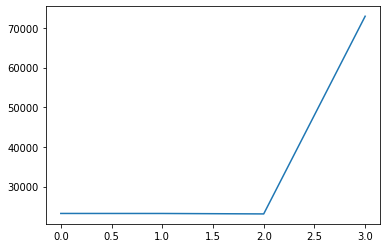

In [24]:
losses_test.clear()
main()
plt.plot(losses_test)
plt.show()


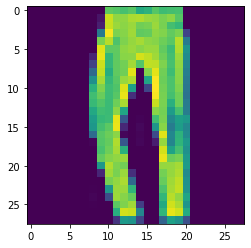

0 1.0115362052231541e-69
1 1.0917808828982998e-44
2 4.399458802031247e-73
3 2.2980141807324e-311
4 8.421293903796923e-63
5 2.48243259349979e-161
6 1.801542506759974e-194
7 1.6660807653468223e-51
8 1.0
9 7.729647457624631e-84
Correct:  1 Choisi:  8


In [26]:
guess(5)

